In [2]:
# 8.1 Reweighting a probability distribution to a different temperature

import numpy as np

def reweight_distribution(original_distribution, temperature = 0.5):
    distribution = np.log(original_distribution)/temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)



In [3]:
# 8.2 Downloading and parsing the initial text file

import keras

path = keras.utils.get_file('nietzsche.txt', origin = 'https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:',len(text))

Corpus length: 600893


In [4]:
# 8.3 Vectorizing sequences of characters

maxlen = 60 # extract sequences of 60 characters.
step = 3 # sample a enw sequences every three characters
sentences = [] # holds the extracted sequences
next_chars = [] # holds the targets

for i in range(0, len(text)- maxlen, step) : 
    sentences.append(text[i:i+maxlen])
    next_chars.append(text[i+maxlen])

print('# of sequences:',len(sentences))

# of sequences: 200278


In [5]:
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))

Unique characters: 58


In [6]:
char_indices = dict((char,chars.index(char)) for char in chars)

In [7]:
# Vactorization ...

x = np.zeros((len(sentences), maxlen, len(chars)), dtype = np.bool)
y = np.zeros((len(sentences),len(chars)),dtype = np.bool)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i,t,char_indices[char]] = 1
    y[i,char_indices[next_chars[i]]] = 1

In [8]:
# Bulding the Network
# 8.4 Single_layer LSTM model for next-character prediction

from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

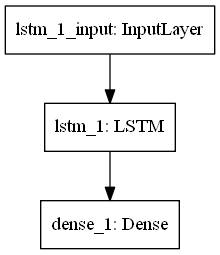

In [13]:
from IPython.display import Image
Image('model.png')

In [14]:
# 8.5 Model compilation configuration

optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer= optimizer)

In [17]:
# 8.6 Function to sample the next character given the model's predicitions
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multinomial.html 

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)/temperature
    exp_preds = np.exp(preds)
    preds = exp_preds/np.sum(exp_preds)
    probas = np.random.multinomial(1,preds,1) 
    return np.argmax(probas)

In [18]:
# 8.7 Text-generation loop

import random
import sys

for epoch in range(1,60):
    print('epoch', epoch)
    model.fit(x,y,batch_size =128, epochs =1)
    start_index = random.randint(0,len(text)-maxlen-1)
    generated_text = text[start_index: start_index+maxlen]
    print('---Generating with seed : "' + generated_text + '"')
    
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print('---temperature:',temperature)
        sys.stdout.write(generated_text)
        
        for i in range(400):
            sampled = np.zeros((1,maxlen,len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0,t,char_indices[char]] = 1.
            preds = model.predict(sampled,verbose=0)[0]
            next_index = sample(preds,temperature)
            next_char = chars[next_index]
            
            generated_text += next_char
            generated_text = generated_text[1:]
            sys.stdout.write(next_char)

epoch 1
Epoch 1/1
200278/200278 [==============================] - 403s 2ms/step - loss: 1.6454
---Generating with seed : "ted and super-imposed, rather
than actually built: this is o"
---temperature: 0.2
ted and super-imposed, rather
than actually built: this is one of the problem the religious an all the problem the experience of the moral of the rearon of the moral the profound of the reality of a person of the comparience of the many and in the reality and the problem and the
end a more the many and in the experience of the problem and in the persion of the moral and in the present and the problem the origin and in the problem and in the entration of th---temperature: 0.5
lem the origin and in the problem and in the entration of the conceptions of contence the manger and the religious the personcess to the restruble be sour an are all the constinct of the more the convelting and the proves and whole such a problem the great which he higher a perface of the great persier, the great 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


rude faith of
the prove posseme of ever proment,
in all fitus chinary"
through formoted-yvald"
diverfuled its are naepoch 2
Epoch 1/1
 35456/200278 [====>.........................] - ETA: 5:44 - loss: 1.5595

KeyboardInterrupt: 